<a target="_blank" href="https://colab.research.google.com/github/D4san/MultiREx-public/blob/main/examples/multirex-quickstart.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## External dependencies

If you are workin in Google Colab use this to install dependencies. When installing `multirex`, `taurex3` is automatically installed.

In [2]:
import sys 
if 'google.colab' in sys.modules:
    !pip install -Uq multirex

In [1]:
import multirex as mrex
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# This is for developing purposes
%load_ext autoreload 
%autoreload 2

## Creating a single system

In [2]:
# Radii and masses are in solar units
star=mrex.Star(temperature=5777,radius=1,mass=1)

# For planets we assume earth units (earth mass and radius)
planet=mrex.Planet(radius=1,mass=1)

# Atmospher
atmo=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=-4, # This is the log10(mix-ratio)
    )
)
planet.set_atmosphere(atmo)

# sma is semimajar axis in AU as used in TauREx 
system=mrex.System(star=star,planet=planet,sma=1)

The path where the Phoenix stellar spectra will be downloaded is :  current directory


Downloading...
From (original): https://drive.google.com/uc?id=1fgKjDu9H26y5WMwRZaMCuSpHhx8zc0pR
From (redirected): https://drive.google.com/uc?id=1fgKjDu9H26y5WMwRZaMCuSpHhx8zc0pR&confirm=t&uuid=9df7e5de-8ad1-4cce-bd6a-c729d65008f8
To: e:\astro\MultiREx-public\examples\Phoenix.zip
100%|██████████| 2.46G/2.46G [01:30<00:00, 27.2MB/s]


**create a list of gasses**

In [3]:
mrex.Util.list_gases()
mrex.Util.get_gases()
mrex.Util.get_stellar_phoenix()

Available gases in the database:
['O3', 'CO2', 'O2', 'CH4', 'H2O']
The directory to the opacity database already exists in the specified path:  current directory
The directory to Phoenix already exists in the specified path:  current directory


'Phoenix'

In [4]:
mrex.Util.list_gases()

Available gases in the database:
['N2', 'NO2', 'O3', 'CH3Cl', 'CO', 'HCN', 'CO2', 'DMS', 'CH4', 'H2O', 'C2H6', 'O2']


Let's create the transmission model:

In [3]:
system.make_tm()

For example we can visualize the spectrum of the planet. But first we must define a range of wavenumbers, we can use the `wavenumber_grid` function to do this.

In [4]:
# wl in microns
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
wn[:10]

array([333.33333333, 334.87347378, 336.42073033, 337.97513585,
       339.53672339, 341.10552611, 342.68157736, 344.26491064,
       345.85555958, 347.45355799])

In [5]:
fig, ax = system.plot_spectrum(wn_grid=wn)

You can manipulate your figure:

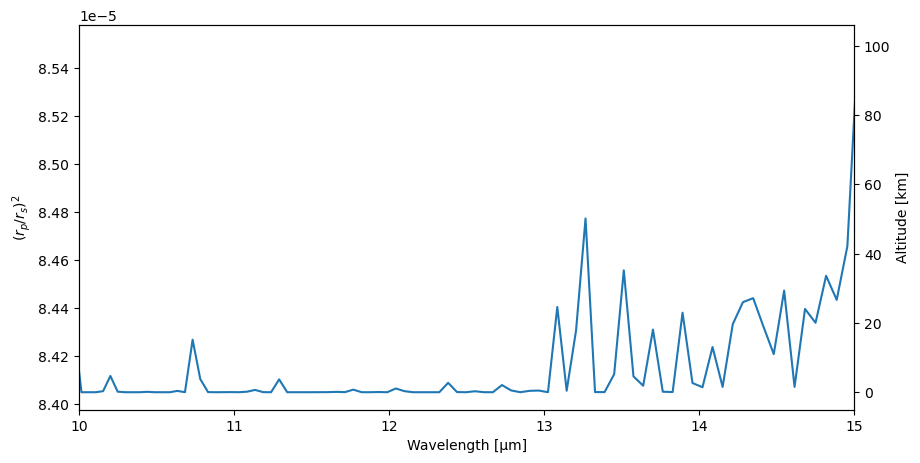

In [6]:
ax.set_xlim(10,15)
fig

Now we can show contibutions:

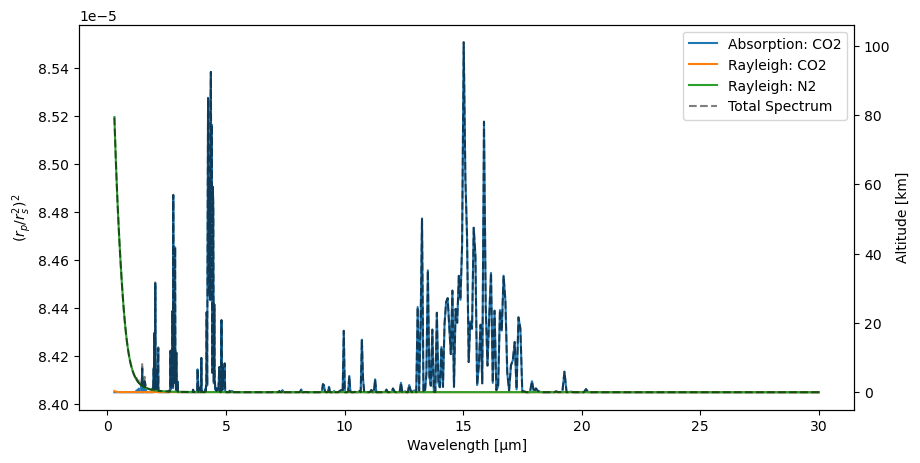

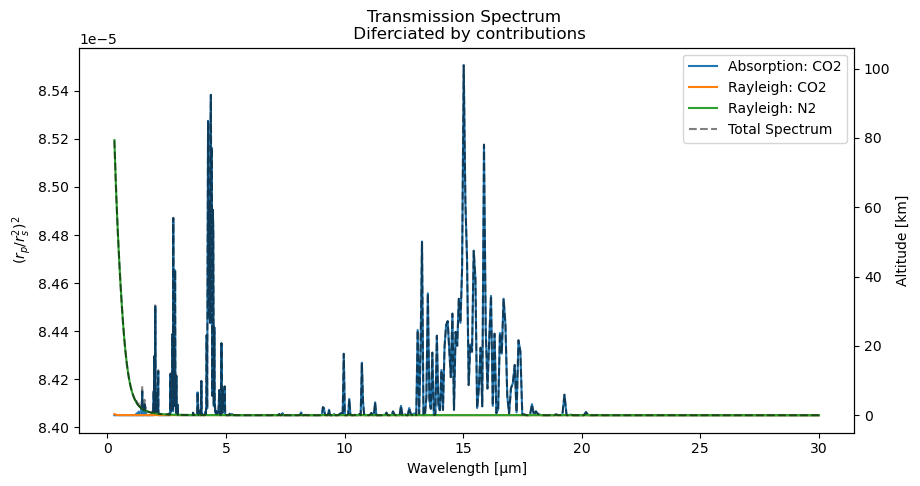

In [7]:
fig, ax = system.plot_contributions(wn_grid=wn, showfig=True, showspectrum=True) ## Add option showfig = False, plot_contributions(..., showspectrum=True)
ax.set_title("Transmission Spectrum \n Diferciated by contributions")
fig

In [8]:
data= system.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
    )

Exploring universes: 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]


Generating observations for 10 spectra...


In [9]:
data.keys()

dict_keys(['spectra', 'observations'])

In [10]:
data["spectra"].describe()

,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,atm seed,atm CO2,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10.0,1.000000e+00,10.0,10.0,1.000000e+00,10.0,10.0,10.0,1.000000e+00,10.0,...,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,10.000000,1.000000e+01
mean,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05
std,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,...,1.428562e-20,0.000000,1.428562e-20,1.428562e-20,1.428562e-20,0.000000,1.428562e-20,1.428562e-20,0.000000,1.428562e-20
min,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05
25%,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05
50%,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05
75%,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05
max,1.0,1.710990e+09,1.0,1.0,1.710990e+09,288.0,100000.0,1.0,1.710990e+09,-4.0,...,8.515397e-05,0.000085,8.516315e-05,8.516773e-05,8.517231e-05,0.000085,8.518152e-05,8.518614e-05,0.000085,8.519481e-05


In [11]:
data["observations"].describe()

,SNR,noise,29.999999999999996,29.862024862864565,29.72468429701139,29.58797538393846,29.451895218566502,29.31644090917717,29.181609577351622,29.04739835790937,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,10.0,1.456121e-07,8.405145e-05,8.404801e-05,8.404758e-05,8.405052e-05,8.405002e-05,8.404907e-05,8.404999e-05,8.404951e-05,...,8.515523e-05,8.515978e-05,8.515795e-05,8.516751e-05,8.517180e-05,8.517540e-05,8.518091e-05,8.518550e-05,8.519051e-05,8.519309e-05
std,0.0,1.606796e-20,1.461592e-07,1.445758e-07,1.443624e-07,1.470401e-07,1.461026e-07,1.462334e-07,1.465673e-07,1.456202e-07,...,1.461857e-07,1.455586e-07,1.461250e-07,1.463752e-07,1.461648e-07,1.460298e-07,1.457776e-07,1.460123e-07,1.449693e-07,1.437705e-07
min,10.0,1.456121e-07,8.349633e-05,8.352728e-05,8.351673e-05,8.352356e-05,8.351081e-05,8.343902e-05,8.345461e-05,8.352018e-05,...,8.466132e-05,8.460742e-05,8.459904e-05,8.461479e-05,8.451692e-05,8.464770e-05,8.462933e-05,8.455917e-05,8.447569e-05,8.464928e-05
25%,10.0,1.456121e-07,8.395167e-05,8.394971e-05,8.394953e-05,8.395040e-05,8.395162e-05,8.395107e-05,8.395112e-05,8.395231e-05,...,8.505670e-05,8.506175e-05,8.505998e-05,8.506863e-05,8.507316e-05,8.507637e-05,8.508167e-05,8.508736e-05,8.509393e-05,8.509491e-05
50%,10.0,1.456121e-07,8.405201e-05,8.404944e-05,8.404807e-05,8.405031e-05,8.404932e-05,8.405085e-05,8.405157e-05,8.404777e-05,...,8.515617e-05,8.516051e-05,8.515682e-05,8.516873e-05,8.517092e-05,8.517679e-05,8.518168e-05,8.518780e-05,8.519374e-05,8.519198e-05
75%,10.0,1.456121e-07,8.415127e-05,8.414510e-05,8.414491e-05,8.414979e-05,8.415068e-05,8.414735e-05,8.414850e-05,8.414812e-05,...,8.525582e-05,8.525887e-05,8.525682e-05,8.526553e-05,8.527056e-05,8.527300e-05,8.527965e-05,8.528664e-05,8.528711e-05,8.528929e-05
max,10.0,1.456121e-07,8.465121e-05,8.460115e-05,8.452935e-05,8.464365e-05,8.455491e-05,8.461352e-05,8.462534e-05,8.461938e-05,...,8.568260e-05,8.565972e-05,8.570343e-05,8.572983e-05,8.571154e-05,8.572649e-05,8.573743e-05,8.572664e-05,8.572657e-05,8.575343e-05


## Creating a Multiverse

First we can create the components of a planetary system.

In [12]:
stars = mrex.Star(temperature=5777,radius=1,mass=1)
planets = mrex.Planet(radius=1,mass=1)
atmos=mrex.Atmosphere(
    temperature=288, # in K
    base_pressure=1e5, # in Pa
    top_pressure=1, # in Pa
    fill_gas="N2", # the gas that fills the atmosphere
    composition=dict(
        CO2=(-4,-1), # This is the range of log10(mix-ratio) of CO2
        H2O=(-4,-2),
        CH4=(-6,-3),
        O3=-6
    )
)
planets.set_atmosphere(atmos)
systems=mrex.System(star=stars,planet=planets,sma=1)
systems.make_tm()


Now we can initialize our model and use the other features of multirex.

Now we can generate a dataset spectra varying the parameters who we define as a range, and addionally we can add noise based on the signal to noise ratio to generate a set of observations.

Optionally we can add a label based on the presence of a molecule in the atmosphere.


In [58]:
wn=mrex.wavenumber_grid(wl_min=0.3,wl_max=30,resolution=1000)
data = systems.explore_multiverse(
    wn_grid=wn,
    snr=10,
    n_universes=10, # n_universes : Number of universes. One planet per universe with properties drawn from the priors 
    labels="O3",
    n_observations=1000, # Number of observations per universe
    header=True, # Add header to the observations
)
# This will produce 10 000 observations in total
"""
spectra=True,
observations=True, # Give me the observations
"""

Exploring universes: 100%|██████████| 10/10 [00:16<00:00,  1.70s/it]


Generating observations for 10 spectra...


'\nspectra=True,\nobservations=True, # Give me the observations\n'

In [51]:
data["spectra"]

,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
1,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
5,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
6,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
7,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
8,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


As you can see the planets are the same since you don't include variations in the properties of the planets.

In [52]:
data["observations"].describe()

,SNR,noise,29.999999999999996,29.862024862864565,29.72468429701139,29.58797538393846,29.451895218566502,29.31644090917717,29.181609577351622,29.04739835790937,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
count,10000.0,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,10.0,2.119651e-07,8.404899e-05,8.414022e-05,8.405068e-05,8.405424e-05,8.404813e-05,8.410174e-05,8.407525e-05,8.405260e-05,...,8.514985e-05,8.516174e-05,8.516262e-05,8.516552e-05,8.517374e-05,8.517564e-05,8.517921e-05,8.518775e-05,8.519043e-05,8.519315e-05
std,0.0,2.093270e-08,2.143717e-07,2.239133e-07,2.132551e-07,2.118473e-07,2.133020e-07,2.128798e-07,2.143579e-07,2.129509e-07,...,2.136003e-07,2.147056e-07,2.130861e-07,2.128176e-07,2.130163e-07,2.144171e-07,2.128287e-07,2.138150e-07,2.142817e-07,2.126598e-07
min,10.0,1.604465e-07,8.323337e-05,8.317105e-05,8.323294e-05,8.312146e-05,8.318151e-05,8.327472e-05,8.327211e-05,8.326103e-05,...,8.432938e-05,8.432546e-05,8.439899e-05,8.434016e-05,8.424530e-05,8.432128e-05,8.436772e-05,8.438661e-05,8.443621e-05,8.430125e-05
25%,10.0,2.069162e-07,8.390593e-05,8.398790e-05,8.390723e-05,8.391503e-05,8.390667e-05,8.395870e-05,8.393413e-05,8.391224e-05,...,8.500777e-05,8.502110e-05,8.502370e-05,8.502412e-05,8.503195e-05,8.503363e-05,8.503697e-05,8.504669e-05,8.504727e-05,8.505241e-05
50%,10.0,2.183466e-07,8.404863e-05,8.413827e-05,8.405034e-05,8.405464e-05,8.404980e-05,8.410210e-05,8.407689e-05,8.405333e-05,...,8.515045e-05,8.516342e-05,8.515916e-05,8.516593e-05,8.517568e-05,8.517420e-05,8.517923e-05,8.518753e-05,8.519358e-05,8.519114e-05
75%,10.0,2.264900e-07,8.419096e-05,8.428885e-05,8.419213e-05,8.419401e-05,8.419006e-05,8.424461e-05,8.421896e-05,8.419355e-05,...,8.529269e-05,8.530573e-05,8.530625e-05,8.530603e-05,8.531575e-05,8.531836e-05,8.532219e-05,8.533143e-05,8.533223e-05,8.533619e-05
max,10.0,2.310099e-07,8.485324e-05,8.513364e-05,8.491386e-05,8.491107e-05,8.487672e-05,8.490865e-05,8.504515e-05,8.483791e-05,...,8.604106e-05,8.626554e-05,8.595301e-05,8.604958e-05,8.590393e-05,8.606618e-05,8.601726e-05,8.598638e-05,8.601740e-05,8.599284e-05


In [53]:
spectra,obs=data.values()

In [54]:
obs

,sma,seed,p_radius,p_mass,p_seed,atm temperature,atm base_pressure,atm top_pressure,atm fill_gas,atm seed,...,0.31270820219292045,0.31127000362355567,0.3098384195756855,0.30841341962799274,0.30699497349907345,0.3055830510467927,0.3041776222676445,0.30277865729611425,0.3013861264040437,0.29999999999999993
0,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000086,0.000085,0.000085
1,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
2,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
3,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
4,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9996,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085
9997,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000085,0.000085,0.000086,0.000085
9998,1,None,1,1,None,288,100000.0,1,N2,None,...,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085


In [55]:
obs["atm CO2"].value_counts()

-3.708892    1000
-3.375458    1000
-3.651513    1000
-3.694925    1000
-1.667926    1000
-1.920271    1000
-2.427538    1000
-2.422109    1000
-3.924761    1000
-2.175013    1000
Name: atm CO2, dtype: int64

Text(0.5, 1.0, 'Example of a Spectrum and its observation')

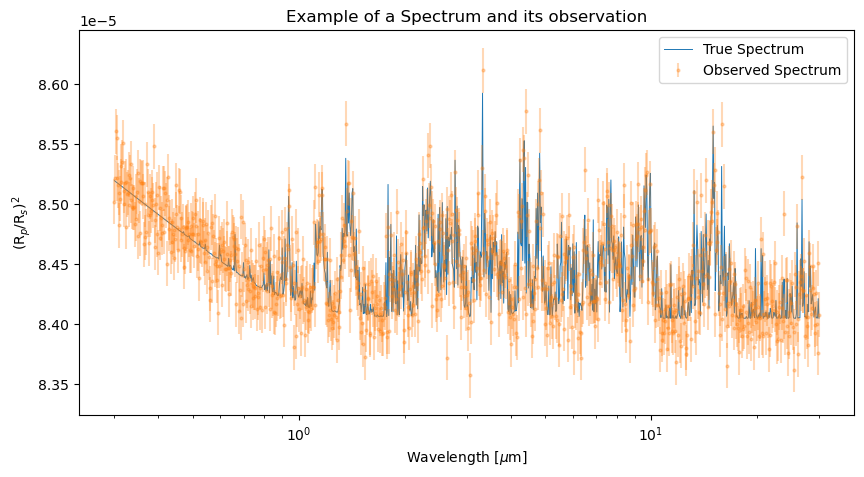

In [56]:
##
plt.figure(figsize=(10,5))
plt.plot(spectra.iloc[0,-1000:],label="True Spectrum",linewidth=0.7)
# obs.iloc[0,obs.channels], obs.channels = -1000:
# obs.spectra = obs.iloc[:,-1000:]	
plt.errorbar(x=1e4/wn,y=obs.iloc[0,-1000:],yerr=obs["noise"][0]*np.ones(1000),
            label="Observed Spectrum",fmt="o",markersize=2,alpha=0.3)
plt.xscale("log")
plt.legend()
plt.xlabel("Wavelength [$\mu$m]")
plt.ylabel("(R$_p$/R$_s$)$^2$")
plt.title("Example of a Spectrum and its observation")
